In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 

In [38]:
df = pd.read_csv(r"D:\Pandas\breast-cancer-wisconsin.csv")

In [39]:
df

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [40]:
df['bare_nuclei'].replace('?', np.nan, inplace = True)

In [41]:
df.isnull().sum()

id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marginal_adhesion          0
single_epith_cell_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

In [42]:
df = df.dropna()
df.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [47]:
df= df.astype(int)

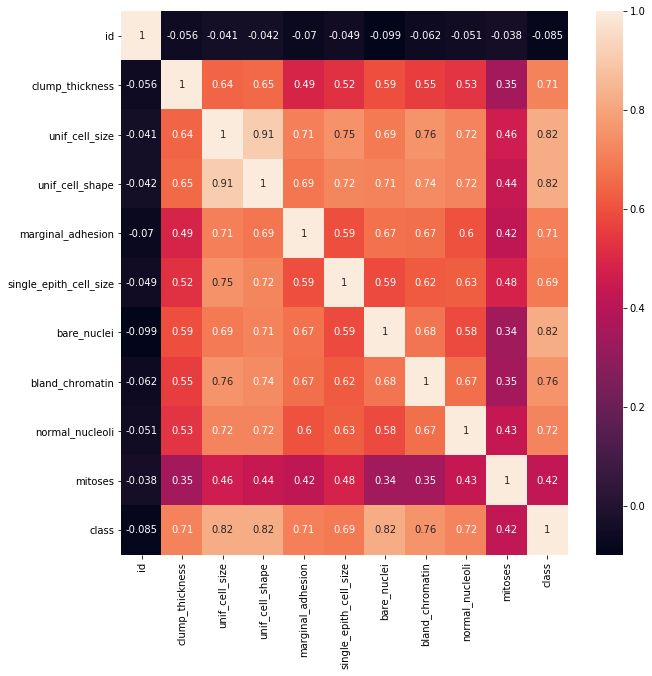

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [49]:
x = df.drop(['id', 'class'], axis = 1)

In [50]:
x

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [51]:
y = df['class']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.276)

In [91]:
logit = linear_model.LogisticRegression(C=1e10, max_iter=1e5)
logit.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000.0,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [92]:
logit.score(x_test,y_test)

0.9682539682539683

In [93]:
logit.score(x_train,y_train)

0.9696356275303644

In [97]:
logit.predict([[5,10,10,3,7,3,8,10,2]])

array([4])